# Cluster product categories (Unsupervised learning)

/var/folders/zf/m3g54d9d25q0jn4s7wbccll00000gn/T/ipykernel_28757/1183548122.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, usecols=["name", "categories", "reviews.rating", "reviews.text", "reviews.title"])


,name,categories,rating,text,title
0,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


name          6028
categories       0
rating          33
text             1
title           17
dtype: int64
[3. 4. 5. 1. 2.]


,name,categories,rating,text,title,title_text,combined_text,categories_encoded
0,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,1
1,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,1
2,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,1
3,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,1
4,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,1


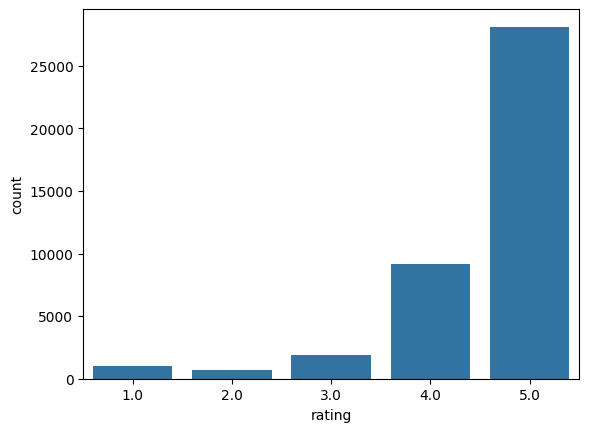

In [6]:
# import and run all cells of the preprocessing file

import nbformat

from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

## Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
emb = model.encode(csv_data["combined_text_processed"].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/1277 [00:00<?, ?it/s]

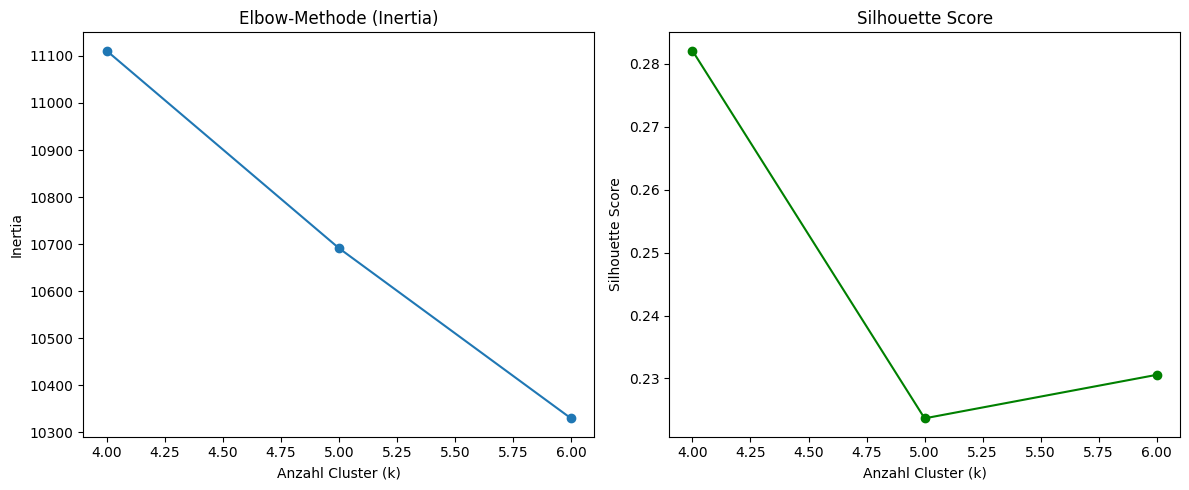

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

amount_of_clusters = range(4, 7)
inertia = []
scores = []

# Find the best amount of clusters with the elbow method and silhouette score
for k in amount_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(emb)

    inertia.append(kmeans.inertia_)
    score = silhouette_score(emb, labels)
    scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(amount_of_clusters), inertia, marker='o')
plt.title("Elbow-Methode (Inertia)")
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(list(amount_of_clusters), scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()    

In [ ]:
# Choosing 4 clusters over 5 provides a better balance between model simplicity and cluster quality.
# The silhouette score is higher with 4 clusters, indicating more distinct and well-separated groups,
# while adding a fifth cluster leads to more overlap and less meaningful segmentation.

k_final = 4

final_kmeans = KMeans(n_clusters=k_final, random_state=0)
csv_data["cluster"] = final_kmeans.fit_predict(emb)

In [28]:
for i in range(k_final):
    print(f"\nCluster {i} – top categories:\n")
    print(csv_data[csv_data["cluster"] == i]["categories"].value_counts().head(5))


Cluster 0 – top categories:

categories
Fire Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys                                    10871
Fire Tablets,Computers/Tablets & Networking,Electronics Features,Tablets,All Tablets,Amazon Tablets,Computers & Tablets,Electronics,iPad & Tablets,Tablets & eBook Readers     2201
Fire Tablets,Learning Toys,Toys,Tablets,Amazon Tablets,Electronics, Tech Toys, Movies, Music,Computers & Tablets,Kids' Tablets,Electronics,iPad & Tablets,Tablets for Kids     1660
Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers                                                 933
Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets                                                                                                             810
Name: count, dtype: int64

Cluster 1 – top categories:

cat

In [32]:
# Find good names for the clusters
mapper = {0: "Entertainment Tablets", 1: "E-Reader & Office Tablets", 2: "Health & household accessories", 3: "Smart Home & Amazon devices"}

# Add cluster name to csv
csv_data["cluster_name"] = csv_data["cluster"].apply(lambda x: mapper[x])

csv_data.head()

,name,categories,rating,text,title,title_text,combined_text,categories_encoded,sentiment,title_text_processed,combined_text_processed,cluster,cluster_name
0,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,1,1,... 3 one item bad quality missing backup spri...,... 3 one item bad quality missing backup spri...,2,Health & household accessories
1,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,1,2,... always less expensive way go product like ...,... always less expensive way go product like ...,2,Health & household accessories
2,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,1,2,... duracell price happy well duracell price h...,... duracell price happy well duracell price h...,2,Health & household accessories
3,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,1,2,... well name brand battery much better seem w...,... well name brand battery much better seem w...,2,Health & household accessories
4,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,1,2,... battery long lasting price great battery l...,... battery long lasting price great battery l...,2,Health & household accessories


## Save the model

In [34]:
import joblib

joblib.dump(final_kmeans, "../models/kmeans_model.pkl")

['../models/kmeans_model.pkl']